## Data Preprocessing

In [1]:
# Importing the libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
#Current path is fetched
cur_path = os.path.dirname(os.getcwd())
print(cur_path)
file_path_train = cur_path + '/data/Stock_Price_GOOGLE_Train.csv'
file_path_test = cur_path + '/data/Stock_Price_GOOGLE_Test.csv'

/Users/palakagrawal/Desktop/Courses/ADS/agrawal_palak_spring18_ads/assignment4


In [3]:
# Importing the training set
google_stock_train_ds = pd.read_csv(file_path_train)
training_set = google_stock_train_ds.iloc[:, 1:2].values

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #observation, timesteps and indicators

## Part A Building RNN 

In [13]:
# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [18]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [11]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0478
Epoch 2/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [============================

## Making the predictions and visualising the results

In [14]:
# Getting the real stock price of 2017
google_stock_test_ds = pd.read_csv(file_path_test)
orig_stock_price = google_stock_test_ds.iloc[:, 1:2].values

In [16]:
# Getting the predicted stock price of 2017
google_stock_ds = pd.concat((google_stock_train_ds['Open'], google_stock_test_ds['Open']), axis = 0)
inputs = google_stock_ds[len(google_stock_ds) - len(google_stock_test_ds) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


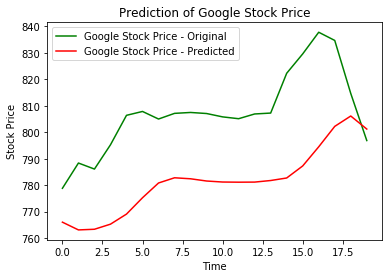

In [17]:
# Visualising the results
plt.plot(orig_stock_price, color = 'green', label = 'Google Stock Price - Original')
plt.plot(predicted_stock_price, color = 'red', label = 'Google Stock Price - Predicted')
plt.title('Prediction of Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


- Since it is a regression problem accuracy should not be used as a metric. Here I use loss as an metric.

## Part B Activation function

- The purpose of the activation function is to introduce non-linearity into the network
- In turn, this allows you to model a response variable (aka target variable, class label, or score) that varies non-linearly with its explanatory variables
- Non-linear means that the output cannot be reproduced from a linear combination of the inputs (which is not the same as output that renders to a straight line--the word for this is affine).
- Another way to think of it: without a non-linear activation function in the network, a NN, no matter how many layers it had, would behave just like a single-layer perceptron, because summing these layers would give you just another linear function.

In [18]:
# Initialising the RNN
regressortan = Sequential()
regressortan.add(LSTM(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressortan.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressortan.add(LSTM(units = 50,activation='tanh', return_sequences = True))
regressortan.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressortan.add(LSTM(units = 50, return_sequences = True))
regressortan.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressortan.add(LSTM(units = 50))
regressortan.add(Dropout(0.2))

regressortan.add(Dense(units = 1))

In [19]:
regressortan.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [20]:
# Fitting the RNN to the Training set
tanh = regressortan.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0676 - acc: 8.3472e-04
Epoch 2/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0074 - acc: 0.0017
Epoch 3/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0060 - acc: 0.0017
Epoch 4/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0048 - acc: 0.0017
Epoch 5/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0052 - acc: 0.0017
Epoch 6/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0046 - acc: 0.0017
Epoch 7/20
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0046 - acc: 0.0017
Epoch 8/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0047 - acc: 0.0017
Epoch 9/20
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0046 - acc: 0.0017
Epoch 10/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0043 - acc: 0.0017
Epoch

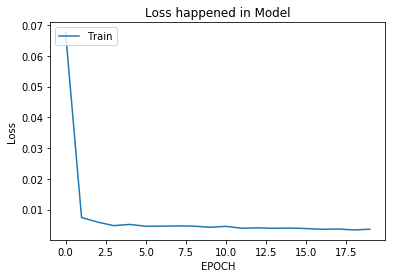

In [21]:
# summarize history for loss
plt.plot(tanh.history['loss'])

plt.title('Loss happened in Model')
plt.ylabel('Loss')
plt.xlabel('EPOCH')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# Initialising the RNN
regressorrelu = Sequential()
regressorrelu.add(LSTM(units = 50,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressorrelu.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressorrelu.add(LSTM(units = 50,activation='relu', return_sequences = True))
regressorrelu.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressorrelu.add(LSTM(units = 50, return_sequences = True))
regressorrelu.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressorrelu.add(LSTM(units = 50))
regressorrelu.add(Dropout(0.2))

regressorrelu.add(Dense(units = 1))

Epoch 1/20
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0394 - acc: 0.0017
Epoch 2/20
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0064 - acc: 0.0017
Epoch 3/20
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0056 - acc: 0.0017
Epoch 4/20
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0047 - acc: 0.0017
Epoch 5/20
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0052 - acc: 0.0017
Epoch 6/20
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0055 - acc: 0.0017
Epoch 7/20
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0045 - acc: 0.0017
Epoch 8/20
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0040 - acc: 0.0017
Epoch 9/20
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0050 - acc: 0.0017
Epoch 10/20
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0042 - acc: 0.0017
Epoch 11/

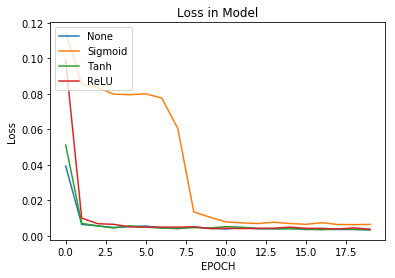

In [23]:
epochs = 20

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(LSTM(units = 50,activation=activation, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation=activation, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation=activation, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])    
    history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=epochs)
    
    plt.plot(history.history['loss'])
    
plt.title('Loss in Model')
plt.ylabel('Loss')
plt.xlabel('EPOCH')
plt.legend(['None', 'Sigmoid', 'Tanh', 'ReLU'], loc='upper left')

## Part C Cost function

- Log loss has the nice property that it is a differentiable function. 
- Accuracy might be more important and is definitely more interpretable but is not directly usable in the training of the network due to the backpropagation algorithm that requires the loss function to be differentiable.
- When your preferred loss is not directly optimizable (like the accuracy) you use a loss function that behaves similarly to proxy the true metric.
- In case of binary classification you would use a sigmoid at the end and a log loss to approximate accuracy. They are highly correlated.

Epoch 1/20
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0524
Epoch 2/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0040
Epoch 3/20
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0028
Epoch 4/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0023
Epoch 5/20
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0026
Epoch 6/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0021
Epoch 7/20
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0020
Epoch 8/20
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0020
Epoch 9/20
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0020
Epoch 10/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0019
Epoch 11/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0022
Epoch 12/20
1198/1198 [==============================] - 20s 16

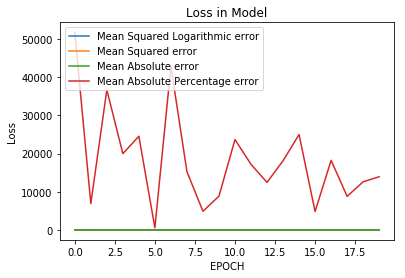

In [24]:
epochs = 20

for cost in ['mean_squared_logarithmic_error', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']:
    model = Sequential()
    model.add(LSTM(units = 50,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation='relu', return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation='relu', return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(loss=cost,
              optimizer='adam')    
    history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=epochs)
    
    plt.plot(history.history['loss'])
    
plt.title('Loss in Model')
plt.ylabel('Loss')
plt.xlabel('EPOCH')
plt.legend(['Mean Squared Logarithmic error', 'Mean Squared error', 'Mean Absolute error', 'Mean Absolute Percentage error'], loc='upper left')

## Part D Epochs

- The batch size defines the gradient and how often to update weights. An epoch is the entire training data exposed to the network, batch-by-batch.
- Small batch sizes with large epoch size and a large number of training epochs are common in modern deep learning implementations.
- This may or may not hold with your problem. Gather evidence and see.
- Try batch size equal to training data size, memory depending (batch learning).
- Try a batch size of one (online learning).
- Try a grid search of different mini-batch sizes (8, 16, 32, …).
- Try training for a few epochs and for a heck of a lot of epochs.
- Consider a near infinite number of epochs and setup check-pointing to capture the best performing model seen so far, see more on this further down.
- Some network architectures are more sensitive than others to batch size. I see Multilayer Perceptrons as often robust to batch size, whereas LSTM and CNNs quite sensitive, but that is just anecdotal.

Epoch 1/10
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0867 - acc: 8.3472e-04
Epoch 2/10
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0090 - acc: 0.0017
Epoch 3/10
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0066 - acc: 0.0017
Epoch 4/10
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0063 - acc: 0.0017
Epoch 5/10
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0065 - acc: 0.0017
Epoch 6/10
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0059 - acc: 0.0017
Epoch 7/10
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0056 - acc: 0.0017
Epoch 8/10
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0059 - acc: 0.0017
Epoch 9/10
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0052 - acc: 0.0017
Epoch 10/10
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0049 - acc: 0.0017
Epoch

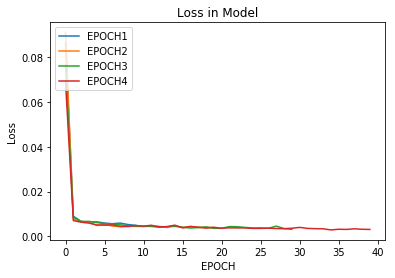

In [25]:
for epochs in [10,20,30,40]:
    model = Sequential()
    model.add(LSTM(units = 50,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation='relu', return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation='relu', return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])    
    history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=epochs)
    
    plt.plot(history.history['loss'])
    
plt.title('Loss in Model')
plt.ylabel('Loss')
plt.xlabel('EPOCH')
plt.legend(['EPOCH1', 'EPOCH2', 'EPOCH3', 'EPOCH4'], loc='upper left')

- As the epoch increases, the loss decreases

## Part E  Gradient estimation

Epoch 1/20
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0922 - acc: 8.3472e-04
Epoch 2/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0095 - acc: 0.0017
Epoch 3/20
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0068 - acc: 0.0017
Epoch 4/20
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0059 - acc: 0.0017
Epoch 5/20
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0064 - acc: 0.0017
Epoch 6/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0064 - acc: 0.0017
Epoch 7/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0056 - acc: 0.0017
Epoch 8/20
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0048 - acc: 0.0017
Epoch 9/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0048 - acc: 0.0017
Epoch 10/20
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0048 - acc: 0.0017
Epoch

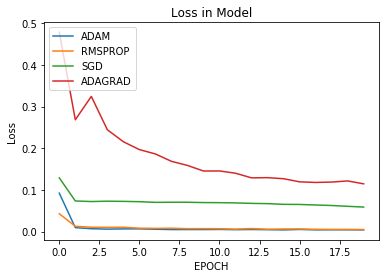

In [26]:
epochs = 20

for optimizer in ['adam', 'rmsprop', 'sgd', 'adagrad']:
    model = Sequential()
    model.add(LSTM(units = 50,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation='relu', return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation='relu', return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['accuracy'])    
    history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=epochs)
    
    plt.plot(history.history['loss'])
    
plt.title('Loss in Model')
plt.ylabel('Loss')
plt.xlabel('EPOCH')
plt.legend(['ADAM', 'RMSPROP', 'SGD', 'ADAGRAD'], loc='upper left')

- Adam optimizer is best for this model.Stochastic Gradient Descent is the default. Get the most out of it first, with different learning rates, momentum and learning rate schedules.
- Many of the more advanced optimization methods offer more parameters, more complexity and faster convergence. This is good and bad, depending on your problem.
- To get the most out of a given method, you really need to dive into the meaning of each parameter, then grid search different values for your problem. Hard. Time Consuming. It might payoff.
- I have found that newer/popular methods can converge a lot faster and give a quick idea of the capability of a given network topology, for example:


## Part F Network Architecture

- Larger networks have a greater representational capability, and maybe we need it.
- More layers offer more opportunity for hierarchical re-composition of abstract features learned from the data. Later networks need more training, both in epochs and in learning rate.

In [27]:
# 3 layers
# Initialising the RNN
model = Sequential()
model.add(LSTM(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50,activation='tanh', return_sequences = True))
model.add(Dropout(0.2))

# Adding a Thrid LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [29]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0457 - acc: 0.0017
Epoch 2/20
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0053 - acc: 0.0017
Epoch 3/20
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0049 - acc: 0.0017
Epoch 4/20
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0044 - acc: 0.0017
Epoch 5/20
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0042 - acc: 0.0017
Epoch 6/20
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0039 - acc: 0.0017
Epoch 7/20
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0039 - acc: 0.0017
Epoch 8/20
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0034 - acc: 0.0017
Epoch 9/20
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0042 - acc: 0.0017
Epoch 10/20
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0041 - acc: 0.0017
Epoch 11/

In [30]:
# 4 layers
# Initialising the RNN
model1 = Sequential()
model1.add(LSTM(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50,activation='tanh', return_sequences = True))
model1.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))

model1.add(Dense(units = 1))

In [31]:
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
# Fitting the RNN to the Training set
model1.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0525
Epoch 2/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0061
Epoch 3/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0048
Epoch 4/20
1198/1198 [==============================] - 19s 15ms/step - loss: 0.0056
Epoch 5/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0053
Epoch 6/20
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0049
Epoch 7/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0045
Epoch 8/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0042
Epoch 9/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0043
Epoch 10/20
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0047
Epoch 11/20
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0044
Epoch 12/20
1198/1198 [==============================] - 18s 15

- The dense network with four layers is best over here.

## Part G  Network initialization

- The weights are the actual parameters of your model that you are trying to find. There are many sets of weights that give good performance, but you want better performance.

- Try all the different initialization methods offered and see if one is better with all else held constant.
- Try pre-learning with an unsupervised method like an autoencoder.
- Try taking an existing model and retraining a new input and output layer for your problem (transfer learning)

In [ ]:
epochs = 20

for init in ['random_uniform','uniform','random_normal' ]:
    model = Sequential()
    model.add(LSTM(units = 50,activation='relu',init=init ,return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation='relu',init=init ,return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50,activation='relu',init=init ,return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['accuracy'])    
    history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=epochs)
    
    plt.plot(history.history['loss'])
    
plt.title('Loss in Model')
plt.ylabel('Loss')
plt.xlabel('EPOCH')
plt.legend(['Random Uniform','Uniform','Random Normal'], loc='upper left')

/Users/palakagrawal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, activation="relu", return_sequences=True, input_shape=(60, 1), kernel_initializer="random_uniform")`
  """
/Users/palakagrawal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, activation="relu", return_sequences=True, kernel_initializer="random_uniform")`
  import sys
/Users/palakagrawal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, activation="relu", return_sequences=True, kernel_initializer="random_uniform")`
  if __name__ == '__main__':


Epoch 1/20
1198/1198 [==============================] - 26s 22ms/step - loss: 0.1034 - acc: 8.3472e-04
Epoch 2/20
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0118 - acc: 0.0017
Epoch 3/20
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0064 - acc: 0.0017
Epoch 4/20
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0062 - acc: 0.0017
Epoch 5/20
 640/1198 [===============>..............] - ETA: 8s - loss: 0.0053 - acc: 0.0000e+00

- Improving Neural network performance https://machinelearningmastery.com/improve-deep-learning-performance/